In [202]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
# Dataset
car_evaluation = fetch_ucirepo(id=19) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 

In [204]:
print(X.head())

  buying  maint doors persons lug_boot safety
0  vhigh  vhigh     2       2    small    low
1  vhigh  vhigh     2       2    small    med
2  vhigh  vhigh     2       2    small   high
3  vhigh  vhigh     2       2      med    low
4  vhigh  vhigh     2       2      med    med


In [205]:
print("Dataset size:", X.shape)
print("\nData Types:")
print(X.dtypes)

print("\nNumber of unique values per column:")
print(X.nunique())

print("\nDistribution by class:")
print(y['class'].value_counts())


Dataset size: (1728, 6)

Data Types:
buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

Number of unique values per column:
buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
dtype: int64

Distribution by class:
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


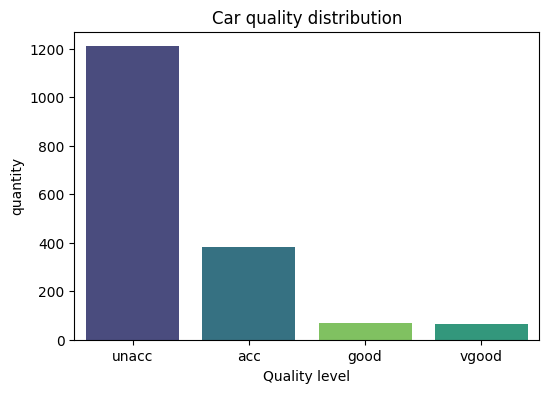

In [206]:
plt.figure(figsize=(6,4))
sns.countplot(x='class',hue='class',data=y,order=y['class'].value_counts().index,palette='viridis',legend=False)
plt.title('Car quality distribution')
plt.xlabel('Quality level')
plt.ylabel('quantity')
plt.show()

In [207]:
Label_encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col])
    Label_encoders[col] = le

target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y.squeeze())

In [208]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [209]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [210]:
dt_pred = dt_model.predict(x_test)
acc = accuracy_score(y_test, dt_pred)
print(f"Accuracy of Decision Tree Model: {round(acc*100, 2)}")
print(f"\nClassification Report of Decision Model: \n{classification_report(y_test, dt_pred)}")

Accuracy of Decision Tree Model: 96.82

Classification Report of Decision Model: 
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        83
           1       0.56      0.91      0.69        11
           2       1.00      1.00      1.00       235
           3       1.00      0.82      0.90        17

    accuracy                           0.97       346
   macro avg       0.88      0.91      0.88       346
weighted avg       0.98      0.97      0.97       346



In [211]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [212]:
rf_pred= rf_model.predict(x_test)
acc = accuracy_score(y_test, rf_pred)
print(f"Accuracy of Random Forest Model: {round(acc*100, 2)}")
print(f"\nClassification Report of Random Forest Model: \n{classification_report(y_test, rf_pred)}")

Accuracy of Random Forest Model: 96.53

Classification Report of Random Forest Model: 
              precision    recall  f1-score   support

           0       0.99      0.87      0.92        83
           1       0.55      1.00      0.71        11
           2       1.00      1.00      1.00       235
           3       0.94      0.94      0.94        17

    accuracy                           0.97       346
   macro avg       0.87      0.95      0.89       346
weighted avg       0.98      0.97      0.97       346



In [213]:
sample = {
    "buying": 'vhigh',
    "maint": 'vhigh',
    "doors": '2',
    "persons": '2',
    "lug_boot": 'small',
    "safety": 'high'
}

for col, le in Label_encoders.items():
    sample[col] = le.transform([sample[col]])[0]

sample_df = pd.DataFrame([sample])

pred = dt_model.predict(sample_df)
print(pred[0])

pred_label = target_encoder.inverse_transform(pred)
print(pred_label[0])


2
unacc
